In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 1000)


In [4]:
# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [ ]:
orderlines.shape

In [ ]:
orderlines.info()

In [ ]:
orderlines.head(10)

In [ ]:
orders.shape

In [ ]:
brands.shape

In [ ]:
products.shape

In [ ]:
products.info()

In [ ]:
#products["type"] = pd.to_numeric(products["type"]) #doesn't work, because there are strings with "E+xx"

In [ ]:
products.head(500)

In [ ]:
products["type"].value_counts()

In [ ]:
p = products.groupby("type").agg({"sku":"count"}).reset_index()
p

# **Categorize products by name and check the revenue and discount for each category**

In [ ]:
"""
# write everything in columns "name" and "desc" in lower cases
products["name"] = products["name"].str.lower()
products["desc"] = products["desc"].str.lower()
products.head(10)
"""

In [ ]:
"""
# built function to categorize products based on the name-column

def categorize(row):
  # categorizing products based on the name-column
  if ("power" in row or "battery" in row):
    return "power"
  elif ("adapter" in row or "cable" in row or "connector" in row):
    return "cable & adapters"
  elif ("case" in row or "sleeve" in row or "housing" in row or "mount" in row or "cover" in row or "support" in row or "protector" in row or "stand" in row):
    return "cases, mounts, protection"
  elif ("service" in row or "repair" in row or "license" in row or "licenses" in row):
    return "service & licenses"
  elif ("refurbished" in row or "second" in row):
    return "refurbished"
  elif ("hard drive" in row or "so-dimm" in row or "dimm" in row or "memory" in row or "mouse" in row or "keyboard" in row or "microphone" in row or "headset" in row or "earphone" in row or "pen" in row or "display" in row or "flash" in row or "raid" in row or "presenter" in row or "handsfree" in row or "disk" in row or "stylus" in row or "artpen" in row or "kit" in row):
    return "components" 
  elif ("network" in row or "wifi" in row or "ethernet" in row or "LAN" in row or "NAS" in row or "router" in row or "firewire" in row):
    return "network"
  elif "macBook" in row:
    return "MacBook"
  elif "imac" in row:
    return "iMac"
  elif "ipod" in row:
    return "iPod"
  elif "iphone" in row:
    return "iPhone"
  elif ("ipad" in row or "tablet" in row):
    return "Tablets"  
  elif "watch" in row:
    return "watch"
  elif "gopro" in row:
    return "GoPro"
  else:
    return "Other"
"""

In [ ]:
"""
# use function to create new column "category" and categorize products

products["category"] = products["name"].apply(lambda row: categorize(row))
products.head(100)
"""

In [5]:
# final catgorization, group has decided on --> used in all the following tasks

products['category']= pd.np.where(products.desc.str.contains("Macbook"),"Macbook", 
                      pd.np.where(products.desc.str.contains("iMac"),"iMac",
                      pd.np.where(products.desc.str.contains("ipod"),"ipod",
                      pd.np.where(products.desc.str.contains("iPhone"),"IPhone",
                      pd.np.where(products.desc.str.contains("tablet"),"tablet",
                      pd.np.where(products.desc.str.contains("ipad"),"tablet",
                      pd.np.where(products.desc.str.contains("cable"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("adapter"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("case"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("tripod"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("mount"),"cases&mounts&protection", 
                      pd.np.where(products.desc.str.contains("glasses"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("backpack"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("magsafe"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("services"),"service&licences",
                      pd.np.where(products.desc.str.contains("license"),"service&licences", 
                      pd.np.where(products.desc.str.contains("drive"),"components",
                      pd.np.where(products.desc.str.contains("stick"),"components",
                      pd.np.where(products.desc.str.contains("RAM"),"components",
                      pd.np.where(products.desc.str.contains("display"),"components",
                      pd.np.where(products.desc.str.contains("mice"),"components",
                      pd.np.where(products.desc.str.contains("keyboard"),"components",
                      pd.np.where(products.desc.str.contains("pen"),"components",            
                      pd.np.where(products.desc.str.contains("headset"),"components",            
                      pd.np.where(products.desc.str.contains("earphone"),"components",            
                      pd.np.where(products.desc.str.contains("LAN"),"network",
                      pd.np.where(products.desc.str.contains("Wifi"),"network",
                      pd.np.where(products.desc.str.contains("router"),"network",
                      pd.np.where(products.desc.str.contains("NAS"),"network",
                      pd.np.where(products.desc.str.contains("FireWire"),"network",
                      pd.np.where(products.desc.str.contains("GoPro"),"GoPro",
                      pd.np.where(products.desc.str.contains("power"),"Power",
                      pd.np.where(products.desc.str.contains("batter"),"Power",
                      pd.np.where(products.desc.str.contains("watch"),"Watches", 
                      pd.np.where(products.desc.str.contains("second-hand"),"Refurbished products",
                      pd.np.where(products.desc.str.contains("refurbished"),"Refurbished products","other"))))))))))))))))))))))))))))))))))));
productsgrcat=products.groupby(['category']).agg({'category':'count'})
productsgrcat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Th

,category
category,
GoPro,10
IPhone,2945
Macbook,191
Power,85
Refurbished products,18
Watches,14
cable&adapters,333
cases&mounts&protection,279
components,2111


In [ ]:
orderlines.head(10)

In [6]:
# formatting the dates

orders["created_date"] = pd.to_datetime(orders["created_date"])
orderlines["date"] = pd.to_datetime(orderlines["date"])

In [7]:
# creating a df with only completed orders

orders_compl = orders.query("state == 'Completed'")

In [8]:
orders_compl = (
    orders_compl
    .assign(month_year=orders["created_date"].dt.strftime("%b %Y"),
            year=orders["created_date"].dt.strftime("%Y"),
            month=orders["created_date"].dt.strftime("%m"),
            day=orders["created_date"].dt.strftime("%a"))
)

In [ ]:
orders_compl.head(10)

In [9]:
# merge orders_compl with orderlines, to later see total sales of each product/category

orders_merged = (
    orders_compl
    .merge(orderlines, left_on="order_id", right_on="id_order")
)

orders_merged

,order_id,created_date,total_paid,state,check_orders_x,month_year,year,month,day,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_y
0,241423,2017-11-06 13:10:02,136.15,Completed,True,Nov 2017,2017,11,Mon,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,129.16,True
1,242832,2017-12-31 17:40:03,15.76,Completed,True,Dec 2017,2017,12,Sun,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,10.77,True
2,243330,2017-02-16 10:59:38,84.98,Completed,True,Feb 2017,2017,02,Thu,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,77.99,True
3,245275,2017-06-28 11:35:37,149.00,Completed,True,Jun 2017,2017,06,Wed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30,149.00,True
4,245595,2017-01-21 12:52:47,112.97,Completed,True,Jan 2017,2017,01,Sat,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00,105.98,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62098,527042,2018-03-14 11:47:50,18.98,Completed,True,Mar 2018,2018,03,Wed,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99,True
62099,527070,2018-03-14 11:50:48,24.97,Completed,True,Mar 2018,2018,03,Wed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,True
62100,527074,2018-03-14 11:51:42,24.97,Completed,True,Mar 2018,2018,03,Wed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,True
62101,527096,2018-03-14 11:58:40,34.96,Completed,True,Mar 2018,2018,03,Wed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,True


In [10]:
# merge orders_merged with products to get categories based on sku

orders_merged = (
    orders_merged
    .merge(products, on="sku")
)

orders_merged

,order_id,created_date,total_paid,state,check_orders_x,month_year,year,month,day,id,...,unit_price,date,total_price,check_orders_y,name,desc,price,type,max_price_orderlines,category
0,241423,2017-11-06 13:10:02,136.15,Completed,True,Nov 2017,2017,11,Mon,1398738,...,129.16,2017-11-06 12:47:20,129.16,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other
1,269440,2017-01-18 19:15:00,213.98,Completed,True,Jan 2017,2017,01,Wed,1151714,...,136.99,2017-01-18 19:12:49,136.99,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other
2,304328,2017-01-07 17:27:26,177.97,Completed,True,Jan 2017,2017,01,Sat,1133913,...,136.99,2017-01-07 17:13:59,136.99,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other
3,305628,2017-01-09 12:30:07,140.98,Completed,True,Jan 2017,2017,01,Mon,1136917,...,136.99,2017-01-09 12:22:46,136.99,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other
4,306550,2017-01-10 15:28:00,143.98,Completed,True,Jan 2017,2017,01,Tue,1139281,...,136.99,2017-01-10 15:23:11,136.99,True,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61737,526066,2018-03-13 20:12:28,87.98,Completed,True,Mar 2018,2018,03,Tue,1647425,...,83.99,2018-03-12 17:45:42,83.99,True,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1405,NaN,tablet
61738,526093,2018-03-12 18:38:36,90.98,Completed,True,Mar 2018,2018,03,Mon,1647495,...,83.99,2018-03-12 18:32:29,83.99,True,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1405,NaN,tablet
61739,526212,2018-03-12 23:43:35,1266.60,Completed,True,Mar 2018,2018,03,Mon,1647777,...,1181.33,2018-03-12 23:28:51,1181.33,True,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,"2,17E+11",NaN,components
61740,526440,2018-03-13 15:17:54,885.17,Completed,True,Mar 2018,2018,03,Tue,1648399,...,878.18,2018-03-13 15:08:27,878.18,True,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,12175397,NaN,network


In [ ]:
orders_merged.info()

In [11]:
# drop not useful columns

orders_merged = (
    orders_merged
    .drop(["state", "id_order", "check_orders_x", "type",
           "max_price_orderlines", "id", "product_id",
           "date", "check_orders_y"], axis=1)
)

orders_merged

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category
0,241423,2017-11-06 13:10:02,136.15,Nov 2017,2017,11,Mon,1,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other
1,269440,2017-01-18 19:15:00,213.98,Jan 2017,2017,01,Wed,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other
2,304328,2017-01-07 17:27:26,177.97,Jan 2017,2017,01,Sat,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other
3,305628,2017-01-09 12:30:07,140.98,Jan 2017,2017,01,Mon,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other
4,306550,2017-01-10 15:28:00,143.98,Jan 2017,2017,01,Tue,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61737,526066,2018-03-13 20:12:28,87.98,Mar 2018,2018,03,Tue,1,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet
61738,526093,2018-03-12 18:38:36,90.98,Mar 2018,2018,03,Mon,1,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet
61739,526212,2018-03-12 23:43:35,1266.60,Mar 2018,2018,03,Mon,1,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,components
61740,526440,2018-03-13 15:17:54,885.17,Mar 2018,2018,03,Tue,1,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,network


In [12]:
# create dataframe with "discount value"-column

orders_merged_discount = (
    orders_merged
    .assign(discount_value=
            (orders_merged["price"]-orders_merged["unit_price"]))
)

orders_merged_discount

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value
0,241423,2017-11-06 13:10:02,136.15,Nov 2017,2017,11,Mon,1,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,10.83
1,269440,2017-01-18 19:15:00,213.98,Jan 2017,2017,01,Wed,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00
2,304328,2017-01-07 17:27:26,177.97,Jan 2017,2017,01,Sat,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00
3,305628,2017-01-09 12:30:07,140.98,Jan 2017,2017,01,Mon,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00
4,306550,2017-01-10 15:28:00,143.98,Jan 2017,2017,01,Tue,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61737,526066,2018-03-13 20:12:28,87.98,Mar 2018,2018,03,Tue,1,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01
61738,526093,2018-03-12 18:38:36,90.98,Mar 2018,2018,03,Mon,1,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01
61739,526212,2018-03-12 23:43:35,1266.60,Mar 2018,2018,03,Mon,1,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,components,174.26
61740,526440,2018-03-13 15:17:54,885.17,Mar 2018,2018,03,Tue,1,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,network,246.80


In [13]:
# create dataframe with "percentage of discount"-column

orders_merged_discount = (
    orders_merged_discount
    .assign(discount_perc=
            (orders_merged_discount["discount_value"] / orders_merged_discount["price"] * 100))
)

orders_merged_discount

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value,discount_perc
0,241423,2017-11-06 13:10:02,136.15,Nov 2017,2017,11,Mon,1,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,10.83,7.736267
1,269440,2017-01-18 19:15:00,213.98,Jan 2017,2017,01,Wed,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
2,304328,2017-01-07 17:27:26,177.97,Jan 2017,2017,01,Sat,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
3,305628,2017-01-09 12:30:07,140.98,Jan 2017,2017,01,Mon,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
4,306550,2017-01-10 15:28:00,143.98,Jan 2017,2017,01,Tue,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61737,526066,2018-03-13 20:12:28,87.98,Mar 2018,2018,03,Tue,1,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01,15.161616
61738,526093,2018-03-12 18:38:36,90.98,Mar 2018,2018,03,Mon,1,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01,15.161616
61739,526212,2018-03-12 23:43:35,1266.60,Mar 2018,2018,03,Mon,1,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,components,174.26,12.854919
61740,526440,2018-03-13 15:17:54,885.17,Mar 2018,2018,03,Tue,1,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,network,246.80,21.938168


In [14]:
# sort dataframe on column "discount values" to see negative discount

orders_merged_discount.sort_values("discount_value").head(10)

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value,discount_perc
37897,318345,2017-01-31 17:51:43,3959.10,Jan 2017,2017,01,Tue,1,LAC0217,3959.10,3959.10,6big LaCie Hard Drive 36TB RAID Thunderbolt 3 USB-C,36TB hard drive bays with RAID 6 5 two ports Thunderbolt 3 (40Gb / s) and 5 years warranty for Mac and PC,3399.00,components,-560.10,-16.478376
50703,514165,2018-02-19 18:07:07,2715.99,Feb 2018,2018,02,Mon,1,APP2090,2610.01,2610.01,"Apple iMac 27 ""Core i5 Retina 5K 35GHz | 8GB RAM | 1TB Fusion",IMac desktop computer 27 inch 5K Retina 8GB RAM 1TB Fusion,2305.59,components,-304.42,-13.203562
47689,365831,2017-06-15 10:23:49,1649.99,Jun 2017,2017,06,Thu,1,GTE0106,1649.99,1649.99,G-Technology G-RAID Thunderbolt Hard Drive 20TB RAID 3 and USB-C,20TB RAID disk with 2 bays and removable disks USB connection Thunderbolt-C 3 and 3.1 for Mac and PC,1358.99,other,-291.00,-21.412961
46563,360627,2017-05-30 15:12:49,4238.97,May 2017,2017,05,Tue,1,WAC0162,2289.99,2289.99,Wacom Cintiq Interactive Pen Display 27QHD Mac and PC,professional graphics tablet with widescreen 16: 9 remote control and Pro Pen for Mac and PC.,2049.90,tablet,-240.09,-11.712279
27858,305450,2017-01-09 09:55:53,5549.95,Jan 2017,2017,01,Mon,3,GTE0081,1549.99,4649.97,G-Technology G-RAID Thunderbolt 20TB Extraible 2 USB 3.0 silver,20TB RAID disk with 2 bays and removable disks Thunderbolt connection 2 and USB 3.0 for Mac and PC,1358.99,other,-191.00,-14.054555
25969,304102,2017-01-07 10:22:23,889.99,Jan 2017,2017,01,Sat,1,LAC0179,889.99,889.99,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac and PC,719.00,other,-170.99,-23.781641
25970,306995,2017-01-11 17:23:29,889.99,Jan 2017,2017,01,Wed,1,LAC0179,889.99,889.99,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac and PC,719.00,other,-170.99,-23.781641
22721,394467,2017-08-30 11:58:24,660.33,Aug 2017,2017,08,Wed,1,APP1662,660.33,660.33,Apple iPhone 6s 32GB Space Gray,New 32GB iPhone 6S Libre.,529.00,IPhone,-131.33,-24.826087
45644,385961,2017-08-03 19:08:27,1020.33,Aug 2017,2017,08,Thu,1,APP1988,1020.33,1020.33,Apple iPhone 7 Plus (PRODUCT) Red 128GB,New iPhone 7 plus special edition red free 128GB,889.00,IPhone,-131.33,-14.772778
37016,385899,2017-08-03 16:41:25,660.33,Aug 2017,2017,08,Thu,1,APP1665,660.33,660.33,32GB Apple iPhone 6s Rose Gold,New 32GB iPhone 6S Libre.,529.00,IPhone,-131.33,-24.826087


In [15]:
# sort dataframe on column "discount_perc" to see highest discount

orders_merged_discount.sort_values("discount_perc", ascending=False).head(10)

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value,discount_perc
46341,359758,2017-05-31 13:38:04,1642.46,May 2017,2017,05,Wed,1,SEV0021,0.01,0.01,SSD installation service MacBook Pro Retina,Installing SSD in your MacBook Pro Retina + Data Transfer.,49.99,other,49.98,99.979996
46064,358440,2017-05-23 18:36:44,2041.01,May 2017,2017,05,Tue,1,SEV0018,0.01,0.01,IMac RAM installation service,Installation of RAM in your iMac.,19.99,iMac,19.98,99.949975
3860,512451,2018-02-16 08:51:32,52.93,Feb 2018,2018,02,Fri,5,MOP0107,1.60,8.00,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,external battery capacity 4000mAh output voltage 5V,69.95,Power,68.35,97.712652
3862,512498,2018-02-16 09:02:03,46.94,Feb 2018,2018,02,Fri,5,MOP0107,1.60,8.00,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,external battery capacity 4000mAh output voltage 5V,69.95,Power,68.35,97.712652
61335,512862,2018-02-16 13:01:31,20.97,Feb 2018,2018,02,Fri,2,MOP0109,2.00,4.00,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,external battery capacity 4000mAh output voltage 5V,69.95,Power,67.95,97.140815
8991,513009,2018-02-16 17:33:09,406.80,Feb 2018,2018,02,Fri,20,NTE0013,1.00,20.00,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",Adapter HDD / SSD 2.5 SATA 3.5 compatible with Mac Pro.,26.99,other,25.99,96.294924
3855,512413,2018-02-16 09:24:56,36.95,Feb 2018,2018,02,Fri,3,MOP0107,2.66,7.98,Mophie Powerstation 4000mAh Battery Plus Mini Universal Space Gray,external battery capacity 4000mAh output voltage 5V,69.95,Power,67.29,96.197284
61336,512871,2018-02-16 12:57:43,28.96,Feb 2018,2018,02,Fri,3,MOP0109,2.66,7.98,Mophie Powerstation Mini Universal 4000mAh Battery Plus Rose Gold,external battery capacity 4000mAh output voltage 5V,69.95,Power,67.29,96.197284
60780,512456,2018-02-16 08:56:03,44.95,Feb 2018,2018,02,Fri,2,MOP0106,4.99,9.98,Mophie Powerstation 6000mAh battery Universal Plus Gold,external battery capacity 6000mAh output voltage 5V,89.95,Power,84.96,94.452474
61474,512456,2018-02-16 08:56:03,44.95,Feb 2018,2018,02,Fri,2,MOP0105,4.99,9.98,Mophie Powerstation 6000mAh battery Universal Plus Rose Gold,external battery capacity 6000mAh output voltage 5V,89.95,Power,84.96,94.452474


In [19]:
# drop rows with negative discount

orders_merged_discount = (
    orders_merged_discount
    .drop(orders_merged_discount
          .loc[(orders_merged_discount["discount_value"]) < 0].index)
)

orders_merged_discount

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value,discount_perc
0,241423,2017-11-06 13:10:02,136.15,Nov 2017,2017,11,Mon,1,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,10.83,7.736267
1,269440,2017-01-18 19:15:00,213.98,Jan 2017,2017,01,Wed,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
2,304328,2017-01-07 17:27:26,177.97,Jan 2017,2017,01,Sat,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
3,305628,2017-01-09 12:30:07,140.98,Jan 2017,2017,01,Mon,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
4,306550,2017-01-10 15:28:00,143.98,Jan 2017,2017,01,Tue,1,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,other,3.00,2.143010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61737,526066,2018-03-13 20:12:28,87.98,Mar 2018,2018,03,Tue,1,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01,15.161616
61738,526093,2018-03-12 18:38:36,90.98,Mar 2018,2018,03,Mon,1,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,tablet,15.01,15.161616
61739,526212,2018-03-12 23:43:35,1266.60,Mar 2018,2018,03,Mon,1,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,components,174.26,12.854919
61740,526440,2018-03-13 15:17:54,885.17,Mar 2018,2018,03,Tue,1,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,network,246.80,21.938168


In [17]:
# check to see if all the rows with negative discount are gone

orders_merged_discount.sort_values("discount_value").head(10)

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,total_price,name,desc,price,category,discount_value,discount_perc
50312,425091,2017-11-16 16:57:32,70.93,Nov 2017,2017,11,Thu,1,IFX0154,44.95,44.95,iFixit Battery Battery Kit complete change iPhone 6s Plus,Battery replacement kit with tools for iPhone 6s Plus,44.95,IPhone,0.0,0.0
43937,348566,2017-04-21 23:23:00,59.00,Apr 2017,2017,04,Fri,1,APP1800,59.00,59.00,Apple Strap Orange 42mm Braiding Nailon Space / Anthracite,Braided nylon strap with four layers of tissue for Apple Watch 42 mm,59.00,other,0.0,0.0
43949,348655,2017-04-22 19:41:35,389.89,Apr 2017,2017,04,Sat,1,DLK0111,313.90,313.90,D-Link DIR-890L Wi-Fi Router AC3200 Tri Band Gigabit Cloud,Tri-band wireless router and dual core processor 1GHz.,313.90,network,0.0,0.0
23825,349207,2017-04-24 13:05:05,159.99,Apr 2017,2017,04,Mon,1,LAC0186,159.99,159.99,1TB LaCie Rugged USB 3.0 Thunderbolt,Portable Hard Disk Thunderbolt and USB 3.0 Mac and PC.,159.99,other,0.0,0.0
52763,390138,2017-08-17 10:40:09,119.99,Aug 2017,2017,08,Thu,1,IFX0171,119.99,119.99,"Battery iFixit MacBook Pro 13 ""Retina Late 2013 - Mid 2014",internal battery for Macbooks Retina 13 inches Late 2013 - Mid 2014,119.99,Macbook,0.0,0.0
52764,413189,2017-10-16 20:35:27,126.98,Oct 2017,2017,10,Mon,1,IFX0171,119.99,119.99,"Battery iFixit MacBook Pro 13 ""Retina Late 2013 - Mid 2014",internal battery for Macbooks Retina 13 inches Late 2013 - Mid 2014,119.99,Macbook,0.0,0.0
52765,422605,2017-11-06 14:52:06,132.97,Nov 2017,2017,11,Mon,1,IFX0171,119.99,119.99,"Battery iFixit MacBook Pro 13 ""Retina Late 2013 - Mid 2014",internal battery for Macbooks Retina 13 inches Late 2013 - Mid 2014,119.99,Macbook,0.0,0.0
52766,426995,2017-11-16 13:19:02,124.98,Nov 2017,2017,11,Thu,1,IFX0171,119.99,119.99,"Battery iFixit MacBook Pro 13 ""Retina Late 2013 - Mid 2014",internal battery for Macbooks Retina 13 inches Late 2013 - Mid 2014,119.99,Macbook,0.0,0.0
23826,350919,2017-04-28 22:27:04,159.99,Apr 2017,2017,04,Fri,1,LAC0186,159.99,159.99,1TB LaCie Rugged USB 3.0 Thunderbolt,Portable Hard Disk Thunderbolt and USB 3.0 Mac and PC.,159.99,other,0.0,0.0
52768,460262,2017-12-11 21:09:45,123.98,Dec 2017,2017,12,Mon,1,IFX0171,119.99,119.99,"Battery iFixit MacBook Pro 13 ""Retina Late 2013 - Mid 2014",internal battery for Macbooks Retina 13 inches Late 2013 - Mid 2014,119.99,Macbook,0.0,0.0


In [18]:
# show categories with highest mean discount to plot

p1_orders_merged_discount = (
    orders_merged_discount
    .groupby("category")
    .agg({"discount_perc" : "mean"})
    .sort_values("discount_perc", ascending=False)
    .reset_index()
)

p1_orders_merged_discount

,category,discount_perc
0,Refurbished products,30.733459
1,Power,30.446939
2,cases&mounts&protection,28.528582
3,IPhone,26.537950
4,Watches,21.143361
5,other,21.137651
6,tablet,20.598865
7,Macbook,19.505922
8,cable&adapters,17.542022
9,iMac,16.983240


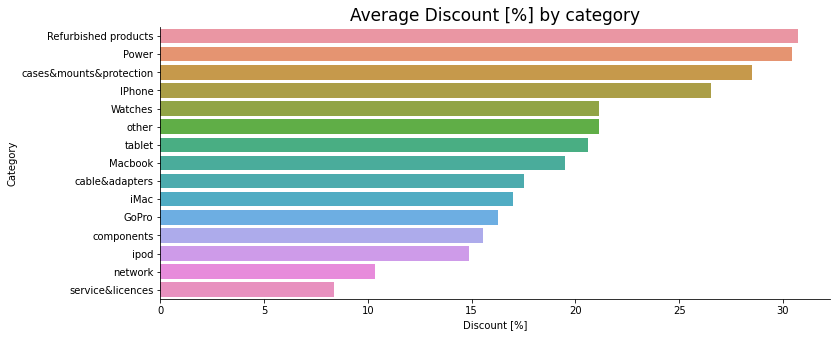

In [ ]:
# plot discount means by category

plt.subplots(figsize=(12, 5))
sns.barplot(data=p1_orders_merged_discount, 
          x="discount_perc", 
          y="category")

plt.title("Average Discount [%] by category", size=17)
plt.xlabel("Discount [%]") # x label name
plt.ylabel("Category") # y label name
plt.ticklabel_format(style="plain", axis="x")
sns.despine()
plt.show()

In [ ]:
# show categories with total revenue to plot

p2_orders_merged_discount = (
    orders_merged_discount
    .groupby("category")
    .agg({"total_price" : "sum"})
    .sort_values("total_price", ascending=False)
    .reset_index()
)

p2_orders_merged_discount

,category,total_price
0,components,6910453.47
1,other,3274315.80
2,IPhone,2684927.46
3,iMac,933590.06
4,network,382811.37
5,tablet,367458.44
6,cable&adapters,340226.62
7,Macbook,138430.98
8,Power,85449.08
9,cases&mounts&protection,62261.73


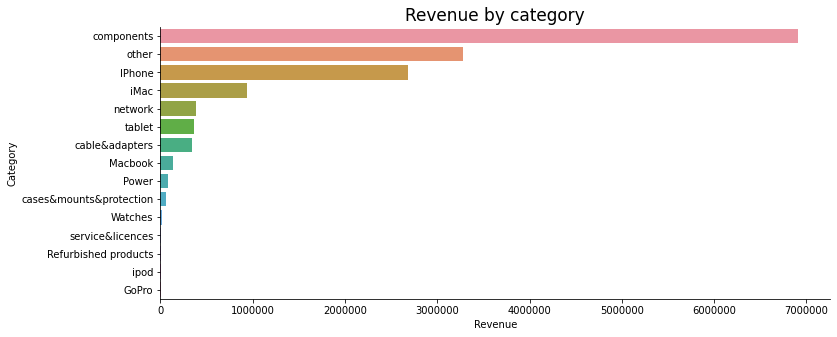

In [ ]:
# plot revneues by category

plt.subplots(figsize=(12, 5))
sns.barplot(data=p2_orders_merged_discount, 
          x="total_price", 
          y="category")

plt.title("Revenue by category", size=17)
plt.xlabel("Revenue") # x label name
plt.ylabel("Category") # y label name
plt.ticklabel_format(style="plain", axis="x")
sns.despine()
plt.show()

# **Show price ranges of sold products in 1st quarter of the years 2017 and 2018**

In [ ]:
# create dateframe for 1st quarter only (Jan, Feb, Mar)

orders_merged_discount_1qu = (
    orders_merged_discount
    .query("month == 'Jan' or month == 'Feb' or month == 'Mar'")
)

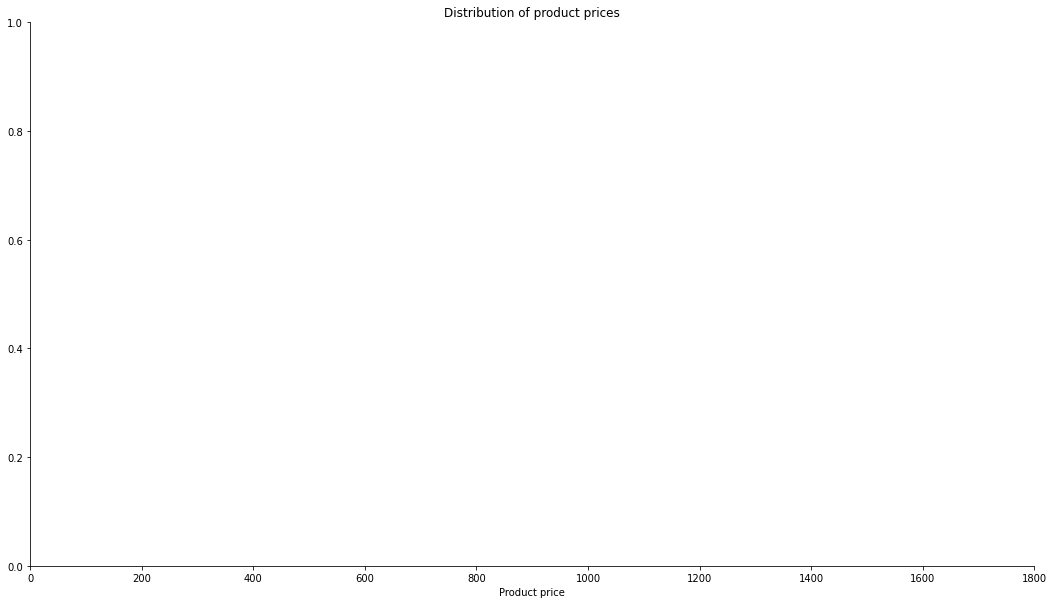

In [ ]:
# plot the datafram
plt.subplots(figsize=(18, 10))

sns.histplot(data=orders_merged_discount_1qu, x="price", hue="year",
             alpha=.4, # add visual transparency to you chart
             kde=True, # add a density line in the histogram
             bins=200 # define the number of bins the variable total paid will be grouped
            )
plt.xlim(0, 1800)
plt.title("Distribution of product prices")
plt.xlabel("Product price")
sns.despine()

# **Show min- and max-price of a product and min- and max-orders**

In [ ]:
min_price = orders_merged_discount["price"].min()
min_price

2.99

In [ ]:
max_price = orders_merged_discount["price"].max()
max_price

9799.0

In [ ]:
min_order = orders_merged_discount["total_price"].min()
min_order

0.01

In [ ]:
max_order = orders_merged_discount["total_price"].max()
max_order

13387.77

# **Show revenue evolution of category "other"**

In [ ]:
# create dateframe to plot

p_other = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "other"]
    .groupby(["month_year", "year", "month"])
    .agg({"total_price":"sum"})
    .reset_index()
    .sort_values(["year", "month"])
)

p_other

,month_year,year,month,total_price
5,Jan 2017,2017,01,236654.09
3,Feb 2017,2017,02,149044.22
9,Mar 2017,2017,03,14138.91
0,Apr 2017,2017,04,109177.77
11,May 2017,2017,05,148920.03
8,Jun 2017,2017,06,114064.00
7,Jul 2017,2017,07,220838.36
1,Aug 2017,2017,08,157433.38
14,Sep 2017,2017,09,132951.99
13,Oct 2017,2017,10,206195.70


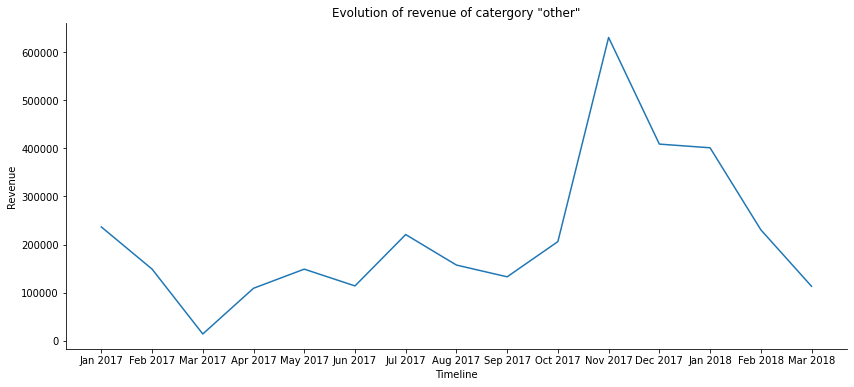

In [ ]:
# plot the dataframe with the evolution of the revenue of category "other"

plt.subplots(figsize=(14, 6))
sns.lineplot(data=p_other,
             x="month_year",
             y="total_price")

plt.title('Evolution of revenue of catergory "other"')
plt.xlabel("Timeline")
plt.ylabel("Revenue")
sns.despine()
plt.show()

# **Show evolution of mean discount of category "other"**

In [ ]:
# create dataframe to plot

p2_other = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "other"]
    .groupby(["month_year", "year", "month"])
    .agg({"discount_perc":"mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

p2_other

,month_year,year,month,discount_perc
5,Jan 2017,2017,01,20.730323
3,Feb 2017,2017,02,19.352713
9,Mar 2017,2017,03,19.972528
0,Apr 2017,2017,04,15.675306
11,May 2017,2017,05,15.433541
8,Jun 2017,2017,06,17.992953
7,Jul 2017,2017,07,22.604389
1,Aug 2017,2017,08,18.949886
14,Sep 2017,2017,09,20.245310
13,Oct 2017,2017,10,24.180149


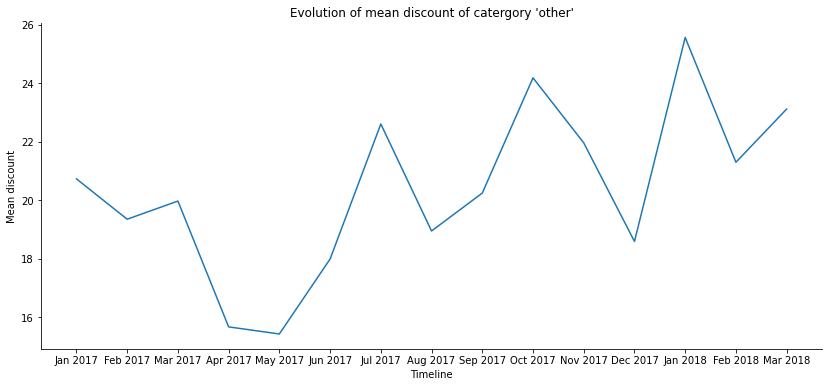

In [ ]:
# plot the dataframe with the evolution of the mean discount of category "other"

plt.subplots(figsize=(14, 6))
sns.lineplot(data=p2_other,
             x="month_year",
             y="discount_perc")

plt.title('Evolution of mean discount of catergory "other"')
plt.xlabel("Timeline")
plt.ylabel("Mean discount")
sns.despine()
plt.show()

# **Number of discounted products**

In [ ]:
# create column "discount_check" to see if there has been a discount

orders_merged_discount["discount_check"] = (
    orders_merged_discount
    .apply(lambda x : x["discount_value"] > 0, axis=1)
)

orders_merged_discount["discount_check"].value_counts()

True     56203
False     3859
Name: discount_check, dtype: int64

In [ ]:
# count numbers of discounted products for each category

count_disc_products = (
    orders_merged_discount
    .groupby("category")
    .agg({"discount_check":"sum"})
    .sort_values("discount_check", ascending=False)
    .reset_index()
    .head(20)
)

count_disc_products

,category,discount_check
0,other,18645
1,IPhone,17586
2,components,8028
3,iMac,4051
4,cable&adapters,2539
5,tablet,1191
6,Macbook,1124
7,cases&mounts&protection,1020
8,network,929
9,Power,857


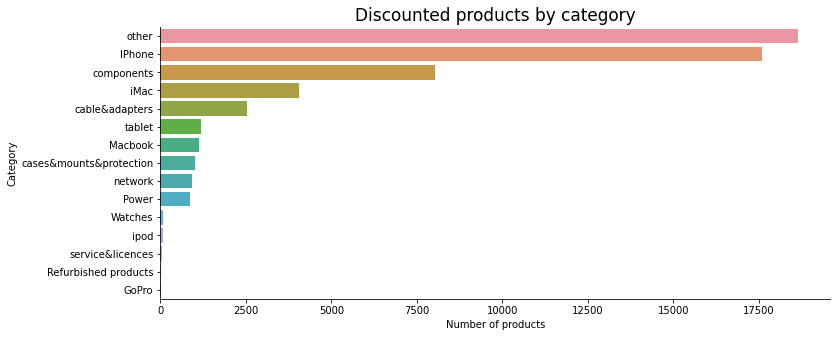

In [ ]:
# plot numbers of discounted products by category

plt.subplots(figsize=(12, 5))
sns.barplot(data=count_disc_products, 
          x="discount_check", 
          y="category")

plt.title("Discounted products by category", size=17)
plt.xlabel("Number of products") # x label name
plt.ylabel("Category") # y label name
sns.despine()
plt.show()

# **Categorize products by brand and check the revenue by each brand**

In [ ]:
brands.head(20)

In [ ]:
# create copy of products to shorten sku to later compare with brands columns "short" --> next step

products_shortsku = products.copy()
products_shortsku = (
    products_shortsku
    .assign(sku_short=products_shortsku["sku"].str[:3])
)

products_shortsku.head(10)

,sku,name,desc,price,type,max_price_orderlines,category,sku_short
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN,other,RAI
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,13855401,NaN,components,APP
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,1387,NaN,cable&adapters,APP
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,1230,NaN,other,APP
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,1364,NaN,iMac,KIN
5,APP0073,Apple Composite AV Cable iPhone and iPod white,IPhone and iPod AV Cable Dock to Composite Video.,45.00,1230,NaN,other,APP
6,KIN0008,Mac Memory Kingston 1GB 667MHz DDR2 SO-DIMM,1GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,18.99,1364,NaN,iMac,KIN
7,KIN0009,Mac Memory Kingston 2GB 800MHz DDR2 SO-DIMM,2GB RAM iMac with Intel Core 2 Duo (Penryn).,36.99,1364,NaN,iMac,KIN
8,KIN0001-2,Mac memory Kingston 4GB (2x2GB) 667MHz DDR2 SO-DIMM,RAM 4GB (2x2GB) Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,74.00,1364,NaN,iMac,KIN
9,APP0100,Apple Adapter Mini Display Port to VGA,Adapter Mini Display Port to VGA MacBook and MacBook Pro (unibody).,35.00,1325,NaN,other,APP


In [ ]:
# merge brands and products_short_sku to later get the toal paid for each brand --> next step

products_brands = (
    products_shortsku
    .merge(brands, left_on = "sku_short", right_on = "short")
)

products_brands

,sku,name,desc,price,type,max_price_orderlines,category,sku_short,short,long
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,8696,NaN,other,RAI,RAI,Rain Design
1,RAI0014,Rain Design iSlider iPad Support,Anodized aluminum support multiposition iPad and iPad mini.,49.99,1216,NaN,other,RAI,RAI,Rain Design
2,RAI0015,Rain Design MTower support MacBook Air / Pro,Aluminum support for MacBook Pro and MacBook Air,59.99,8696,NaN,other,RAI,RAI,Rain Design
3,RAI0016,Rain Design iLevel2 MacBook Support,Adjustable aluminum bracket height compatible with all MacBook,84.99,8696,NaN,other,RAI,RAI,Rain Design
4,RAI0018,"Rain Design Mbase Support for iMac 27 """,Minimalist support lifting drawer iMac 27,84.99,8696,NaN,iMac,RAI,RAI,Rain Design
...,...,...,...,...,...,...,...,...,...,...
10363,RYV0009,Ryval Base Magnetic Qi Wireless Charging Office,Wireless charging base Ryval magnetic and Qi technology ideal for iPhone X / 8Plus / 8 at home and in the office,49.99,5399,NaN,IPhone,RYV,RYV,Ryval
10364,RYV0010,Ryval magnetic Qi Wireless Car Charger,Ryval magnetic car charger and Qi Wireless technology is ideal for iPhone X / 8Plus / 8,49.99,5399,NaN,IPhone,RYV,RYV,Ryval
10365,MTF0008,Mistify Clean Screens Natural 500ml.,Spray cleaning screens and keyboards.,14.99,12085400,NaN,components,MTF,MTF,Mistify
10366,SDE0007,SDesign iPhone charging dock QI X / 8 / Apple Watch (75-10W),Base load compatible with iPhone and Apple Watch supports multiload,69.99,5399,NaN,IPhone,SDE,SDE,SDesign


In [ ]:
# merge complete orders with brands

orders_merged_brands = (
    orders_merged
    .merge(products_brands, on="sku")
)

orders_merged_brands

,order_id,created_date,total_paid,month_year,year,month,day,product_quantity,sku,unit_price,...,category_x,name_y,desc_y,price_y,type,max_price_orderlines,category_y,sku_short,short,long
0,241423,2017-11-06 13:10:02,136.15,Nov 2017,2017,11,Mon,1,LAC0212,129.16,...,other,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other,LAC,LAC,LaCie
1,269440,2017-01-18 19:15:00,213.98,Jan 2017,2017,01,Wed,1,LAC0212,136.99,...,other,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other,LAC,LAC,LaCie
2,304328,2017-01-07 17:27:26,177.97,Jan 2017,2017,01,Sat,1,LAC0212,136.99,...,other,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other,LAC,LAC,LaCie
3,305628,2017-01-09 12:30:07,140.98,Jan 2017,2017,01,Mon,1,LAC0212,136.99,...,other,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other,LAC,LAC,LaCie
4,306550,2017-01-10 15:28:00,143.98,Jan 2017,2017,01,Tue,1,LAC0212,136.99,...,other,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,139.99,11935397,NaN,other,LAC,LAC,LaCie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61699,526066,2018-03-13 20:12:28,87.98,Mar 2018,2018,03,Tue,1,WAC0254,83.99,...,tablet,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1405,NaN,tablet,WAC,WAC,Wacom
61700,526093,2018-03-12 18:38:36,90.98,Mar 2018,2018,03,Mon,1,WAC0252,83.99,...,tablet,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,99.00,1405,NaN,tablet,WAC,WAC,Wacom
61701,526212,2018-03-12 23:43:35,1266.60,Mar 2018,2018,03,Mon,1,APP2067-A,1181.33,...,components,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,1355.59,"2,17E+11",NaN,components,APP,APP,Apple
61702,526440,2018-03-13 15:17:54,885.17,Mar 2018,2018,03,Tue,1,PAC2235,878.18,...,network,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,1124.98,12175397,NaN,network,PAC,PAC,Pack


In [ ]:
orders_merged_brands.info()

In [ ]:
# drop not useful columns

orders_merged_brands2 = (
    orders_merged_brands
    .drop(["order_id", "created_date", "product_quantity",
           "unit_price", "name_y", "desc_y", "price_x", 
           "price_y", "type", "max_price_orderlines", 
           "category_y", "sku_short", "short"], axis=1)
)

orders_merged_brands2

,total_paid,month_year,year,month,day,sku,total_price,name_x,desc_x,category_x,long
0,136.15,Nov 2017,2017,11,Mon,LAC0212,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,LaCie
1,213.98,Jan 2017,2017,01,Wed,LAC0212,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,LaCie
2,177.97,Jan 2017,2017,01,Sat,LAC0212,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,LaCie
3,140.98,Jan 2017,2017,01,Mon,LAC0212,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,LaCie
4,143.98,Jan 2017,2017,01,Tue,LAC0212,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,LaCie
...,...,...,...,...,...,...,...,...,...,...,...
61699,87.98,Mar 2018,2018,03,Tue,WAC0254,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,Wacom
61700,90.98,Mar 2018,2018,03,Mon,WAC0252,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,Wacom
61701,1266.60,Mar 2018,2018,03,Mon,APP2067-A,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,components,Apple
61702,885.17,Mar 2018,2018,03,Tue,PAC2235,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,network,Pack


In [ ]:
# groupby brands to see revenue for TOP20-brands

p_orders_merged_brands2 = (
    orders_merged_brands2
    .groupby("long")
    .agg({"total_price" : "sum"})
    .sort_values("total_price", ascending=False)
    .reset_index()
    .head(20)
)

p_orders_merged_brands2

,long,total_price
0,Apple,7662421.34
1,Pack,2445941.62
2,LaCie,535156.40
3,OWC,492387.24
4,Wacom,471343.97
5,LG,391061.66
6,Western Digital,389765.63
7,Crucial,324654.09
8,Dell,291020.97
9,Synology,200268.74


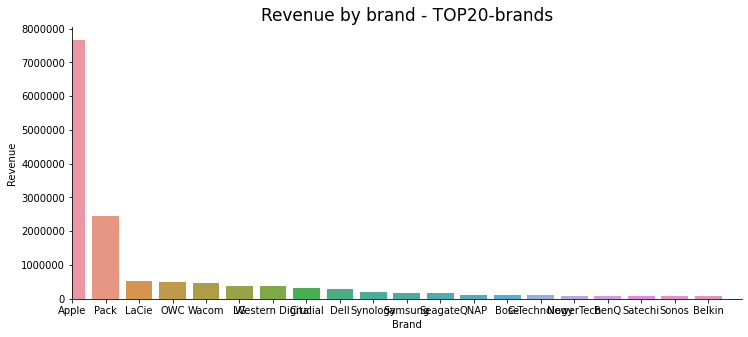

In [ ]:
# plot revenue by brand

plt.subplots(figsize=(12, 5))
sns.barplot(data=p_orders_merged_brands2, 
          x="long", 
          y="total_price")

plt.title("Revenue by brand - TOP20-brands", size=17)
plt.xlabel("Brand")
plt.xlim(0, 20)
plt.ylabel("Revenue")
plt.ticklabel_format(style="plain", axis="y")
sns.despine()
plt.show()

# **Show average discount percentage by brand**

In [ ]:
# create new dataframe, to get discounts and brands for each sku

orders_merged_brands3 = (
    orders_merged_brands
    .drop(["order_id", "created_date", "product_quantity",
           "name_y", "desc_y", "price_x", "type", 
           "max_price_orderlines", "category_y", 
           "sku_short", "short"], axis=1)
)

orders_merged_brands3

,total_paid,month_year,year,month,day,sku,unit_price,total_price,name_x,desc_x,category_x,price_y,long
0,136.15,Nov 2017,2017,11,Mon,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie
1,213.98,Jan 2017,2017,01,Wed,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie
2,177.97,Jan 2017,2017,01,Sat,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie
3,140.98,Jan 2017,2017,01,Mon,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie
4,143.98,Jan 2017,2017,01,Tue,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61699,87.98,Mar 2018,2018,03,Tue,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom
61700,90.98,Mar 2018,2018,03,Mon,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom
61701,1266.60,Mar 2018,2018,03,Mon,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,components,1355.59,Apple
61702,885.17,Mar 2018,2018,03,Tue,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,network,1124.98,Pack


In [ ]:
# create columns "discount_value" and "discount_perc"

orders_merged_brands3 = (
    orders_merged_brands3
    .assign(discount_value=
            (orders_merged_brands3["price_y"]-orders_merged_brands3["unit_price"]))
)

orders_merged_brands3 = (
    orders_merged_brands3
    .assign(discount_perc=
            (orders_merged_brands3["discount_value"] / orders_merged_brands3["price_y"] * 100))
)

orders_merged_brands3

,total_paid,month_year,year,month,day,sku,unit_price,total_price,name_x,desc_x,category_x,price_y,long,discount_value,discount_perc
0,136.15,Nov 2017,2017,11,Mon,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,10.83,7.736267
1,213.98,Jan 2017,2017,01,Wed,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010
2,177.97,Jan 2017,2017,01,Sat,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010
3,140.98,Jan 2017,2017,01,Mon,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010
4,143.98,Jan 2017,2017,01,Tue,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61699,87.98,Mar 2018,2018,03,Tue,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom,15.01,15.161616
61700,90.98,Mar 2018,2018,03,Mon,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom,15.01,15.161616
61701,1266.60,Mar 2018,2018,03,Mon,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,components,1355.59,Apple,174.26,12.854919
61702,885.17,Mar 2018,2018,03,Tue,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,network,1124.98,Pack,246.80,21.938168


In [ ]:
# create column to check if there is discount in the order

orders_merged_brands3["discount_check"] = (
    orders_merged_brands3
    .apply(lambda x : x["discount_value"] > 0, axis=1)
)
  
orders_merged_brands3

,total_paid,month_year,year,month,day,sku,unit_price,total_price,name_x,desc_x,category_x,price_y,long,discount_value,discount_perc,discount_check
0,136.15,Nov 2017,2017,11,Mon,LAC0212,129.16,129.16,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,10.83,7.736267,True
1,213.98,Jan 2017,2017,01,Wed,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010,True
2,177.97,Jan 2017,2017,01,Sat,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010,True
3,140.98,Jan 2017,2017,01,Mon,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010,True
4,143.98,Jan 2017,2017,01,Tue,LAC0212,136.99,136.99,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,External Hard Drive 4TB 35-inch USB 3.0 for Mac and PC.,other,139.99,LaCie,3.00,2.143010,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61699,87.98,Mar 2018,2018,03,Tue,WAC0254,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Pistachio Green,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom,15.01,15.161616,True
61700,90.98,Mar 2018,2018,03,Mon,WAC0252,83.99,83.99,Education - Wacom Intuos Graphics Tablet S Bluetooth Black,small-edge graphics tablet with Bluetooth integrated and creative software worth 110 euros included,tablet,99.00,Wacom,15.01,15.161616,True
61701,1266.60,Mar 2018,2018,03,Mon,APP2067-A,1181.33,1181.33,"Open - Apple MacBook Air 13 ""1.8GHz dual-core Intel Core i5 256GB",Reconditioned computer MacBook Air 13 inch i5 18GHz 8GB RAM and 256GB SSD,components,1355.59,Apple,174.26,12.854919,True
61702,885.17,Mar 2018,2018,03,Tue,PAC2235,878.18,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (2x8TB) WD Red,NAS storage server integrated with special focus on data protection,network,1124.98,Pack,246.80,21.938168,True


In [ ]:
# show brands with highest mean discount to plot

p1_orders_merged_brands3 = (
    orders_merged_brands3
    .groupby("long")
    .agg({"discount_perc" : "mean"})
    .sort_values("discount_perc", ascending=False)
    .reset_index()
    .head(20)
)

p1_orders_merged_brands3

,long,discount_perc
0,Opulus,77.631908
1,Jawbone,74.139576
2,Kukaclip,68.796792
3,Pqi,64.267334
4,Boostcase,62.507813
5,ZaggKeys,57.994099
6,QDos,57.356276
7,Pebble,55.971859
8,Mophie,53.776731
9,Runstastic,53.066472


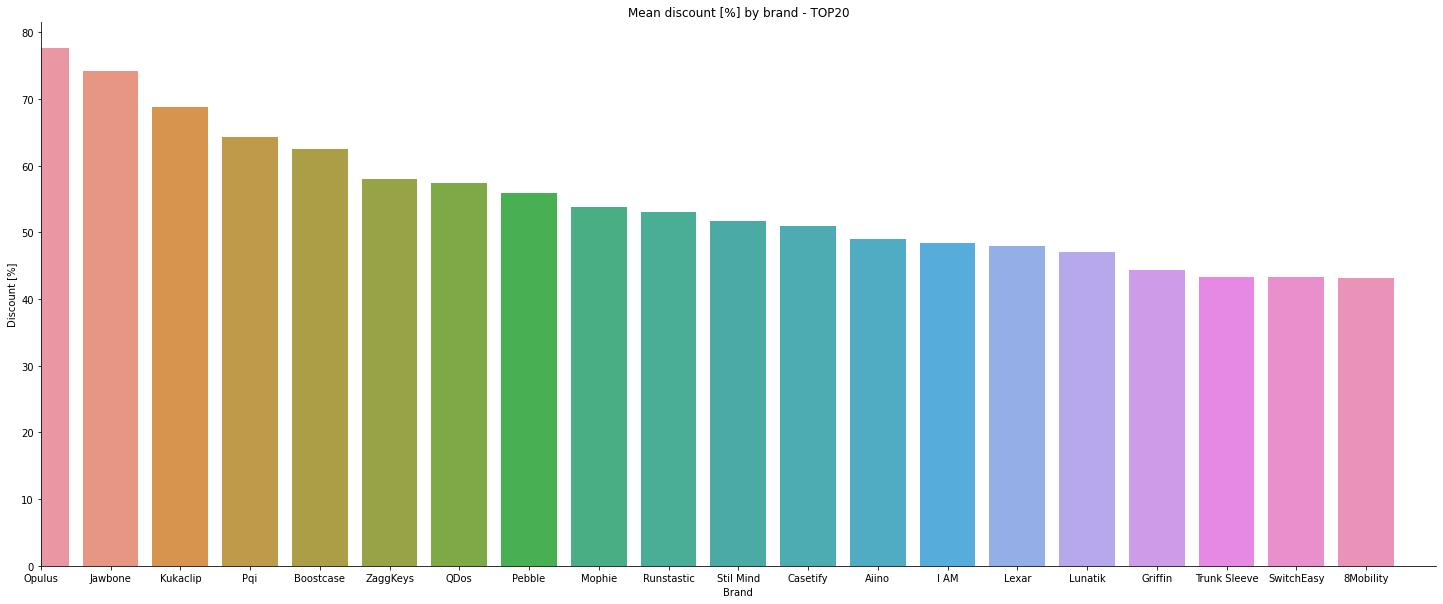

In [ ]:
# plot mean discount percentage by brand

plt.subplots(figsize=(25, 10))
sns.barplot(data=p1_orders_merged_brands3, 
          x="long", 
          y="discount_perc")

plt.title("Mean discount [%] by brand - TOP20")
plt.xlabel("Brand") # x label name
plt.xlim(0, 20)
plt.ylabel("Discount [%]") # y label name
sns.despine()
plt.show()

# **Show evolution of total discount**

In [ ]:
# create datafram to show evolution of discount percentage

p_discount = (
    orders_merged_discount
    .groupby(["month_year", "year", "month"])
    .agg({"discount_perc":"mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

p_discount

,month_year,year,month,discount_perc
5,Jan 2017,2017,01,25.735413
3,Feb 2017,2017,02,20.848091
9,Mar 2017,2017,03,20.168993
0,Apr 2017,2017,04,18.923199
11,May 2017,2017,05,16.651292
8,Jun 2017,2017,06,18.003344
7,Jul 2017,2017,07,25.404366
1,Aug 2017,2017,08,20.964587
14,Sep 2017,2017,09,20.566426
13,Oct 2017,2017,10,21.993913


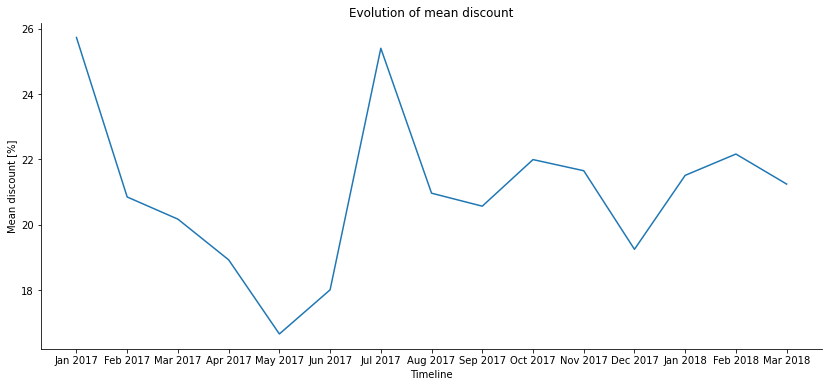

In [ ]:
# plot the dataframe with the evolution of the discount

plt.subplots(figsize=(14, 6))
sns.lineplot(data=p_discount,
             x="month_year",
             y="discount_perc")

plt.title("Evolution of mean discount")
plt.xlabel("Timeline")
plt.ylabel("Mean discount [%]")
sns.despine()
plt.show()

# **Show evolution of total revenue**

In [ ]:
# create dataframe to plot the evolution of total revenue

p_revenue = (
    orders_merged_discount
    .groupby(["month_year", "year", "month"])
    .agg({"total_price":"sum"})
    .reset_index()
    .sort_values(["year", "month"])
)

p_revenue

,month_year,year,month,total_price
5,Jan 2017,2017,01,1070115.31
3,Feb 2017,2017,02,564731.29
9,Mar 2017,2017,03,108914.16
0,Apr 2017,2017,04,462882.79
11,May 2017,2017,05,595194.66
8,Jun 2017,2017,06,615408.26
7,Jul 2017,2017,07,1048747.32
1,Aug 2017,2017,08,688202.87
14,Sep 2017,2017,09,827051.37
13,Oct 2017,2017,10,1056181.02


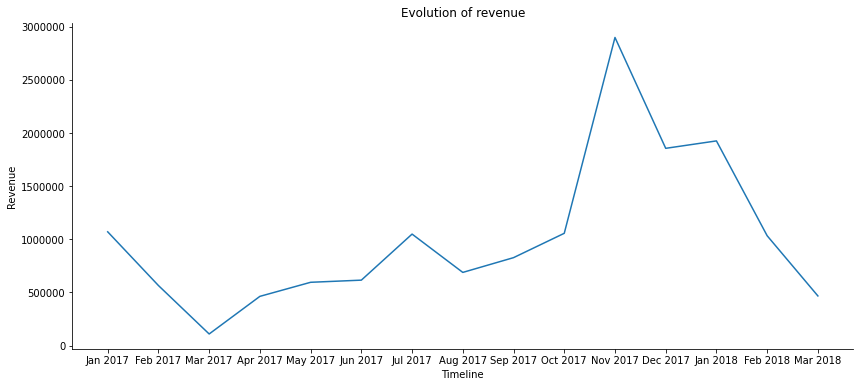

In [ ]:
# plot dataframe to show evolution of revenue

plt.subplots(figsize=(14, 6))
sns.lineplot(data=p_revenue,
             x="month_year",
             y="total_price")

plt.title("Evolution of revenue")
plt.xlabel("Timeline")
plt.ylabel("Revenue")
plt.ticklabel_format(style="plain", axis="y")
sns.despine()
plt.show()

# **Show evolution of total revenue and discount percentage in one graph**

In [ ]:
# create dataframe with evolution of total revenue and mean discount

evo_plot = (
    orders_merged_discount
    .groupby(["month_year", "year", "month"])
    .agg({"total_price" : "sum", "discount_perc" : "mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

evo_plot

,month_year,year,month,total_price,discount_perc
5,Jan 2017,2017,01,1070115.31,25.735413
3,Feb 2017,2017,02,564731.29,20.848091
9,Mar 2017,2017,03,108914.16,20.168993
0,Apr 2017,2017,04,462882.79,18.923199
11,May 2017,2017,05,595194.66,16.651292
8,Jun 2017,2017,06,615408.26,18.003344
7,Jul 2017,2017,07,1048747.32,25.404366
1,Aug 2017,2017,08,688202.87,20.964587
14,Sep 2017,2017,09,827051.37,20.566426
13,Oct 2017,2017,10,1056181.02,21.993913


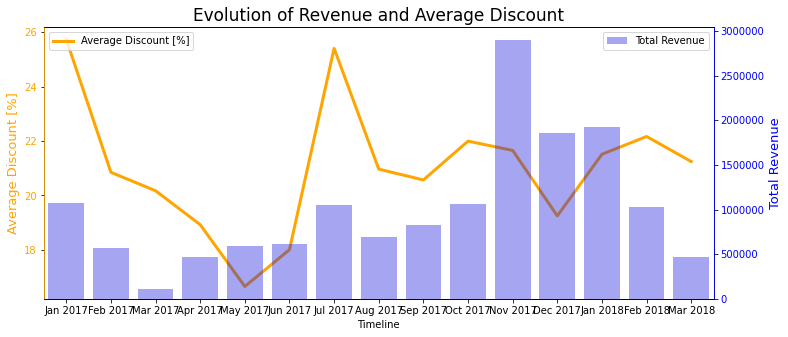

In [ ]:
# plot evo_plot

fig, ax = plt.subplots(figsize=(30, 10))
plt.title("Evolution of Revenue and Average Discount", fontsize = 17)

width = .35
color1 = "blue"
color2 = "orange"

sns.lineplot(data=evo_plot,
             x="month_year",
             y="discount_perc",
             linewidth=3,
             color=color2,
             ax=ax,
             label="Average Discount [%]")

ax.set_ylabel("Average Discount [%]", fontsize = 13, color=color2)
ax.set_xlabel("Timeline")
ax.tick_params(axis="y", labelcolor=color2)
ax.ticklabel_format(style="plain", axis="y")
ax.legend(loc=2)


ax2 = ax.twinx()
sns.barplot(data=evo_plot,
            x="month_year",
            y="total_price",
            color=color1,
            ax=ax2,
            label="Total Revenue",
            alpha=0.4)

ax2.set_ylabel("Total Revenue", fontsize = 13, color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)

ax2.spines["left"].set_color(color2)
ax2.spines["right"].set_color(color1)

plt.show()

# **Show evolution of revenue and discount percentage of category "other" in one graph**

In [ ]:
# create dataframe with evolution of revenue and mean discount of category "other"

evo_other_plot = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "other"]
    .groupby(["month_year", "year", "month"])
    .agg({"total_price" : "sum", "discount_perc" : "mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

evo_other_plot

,month_year,year,month,total_price,discount_perc
5,Jan 2017,2017,01,236654.09,20.730323
3,Feb 2017,2017,02,149044.22,19.352713
9,Mar 2017,2017,03,14138.91,19.972528
0,Apr 2017,2017,04,109177.77,15.675306
11,May 2017,2017,05,148920.03,15.433541
8,Jun 2017,2017,06,114064.00,17.992953
7,Jul 2017,2017,07,220838.36,22.604389
1,Aug 2017,2017,08,157433.38,18.949886
14,Sep 2017,2017,09,132951.99,20.245310
13,Oct 2017,2017,10,206195.70,24.180149


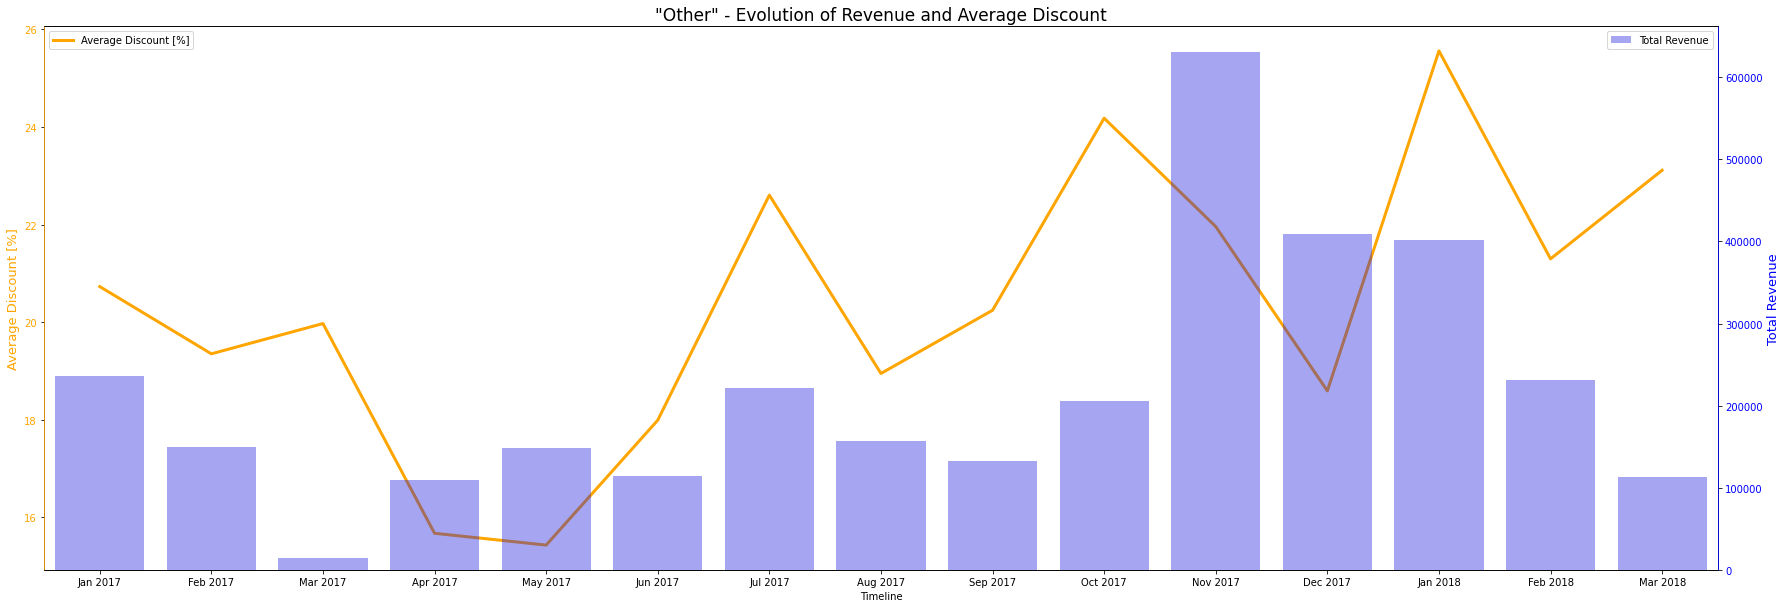

In [ ]:
# plot evo_other_plot

fig, ax = plt.subplots(figsize=(30,10))
plt.title('"Other" - Evolution of Revenue and Average Discount', fontsize = 17)

width = .35
color1 = "blue"
color2 = "orange"

sns.lineplot(data=evo_other_plot,
             x="month_year",
             y="discount_perc",
             linewidth=3,
             color=color2,
             ax=ax,
             label="Average Discount [%]")

ax.set_ylabel("Average Discount [%]", fontsize = 13, color=color2)
ax.set_xlabel("Timeline")
ax.tick_params(axis="y", labelcolor=color2)
ax.ticklabel_format(style="plain", axis="y")
ax.legend(loc=2)


ax2 = ax.twinx()
sns.barplot(data=evo_other_plot,
            x="month_year",
            y="total_price",
            color=color1,
            ax=ax2,
            label="Total Revenue",
            alpha=0.4)

ax2.set_ylabel("Total Revenue", fontsize = 13, color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)

ax2.spines["left"].set_color(color2)
ax2.spines["right"].set_color(color1)

plt.show()

# **Show evolution of revenue and discount percentage of category "iMac" in one graph**

In [ ]:
# create dataframe with evolution of revenue and mean discount of category "iMac"

evo_iMac_plot = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "iMac"]
    .groupby(["month_year", "year", "month"])
    .agg({"total_price" : "sum", "discount_perc" : "mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

evo_iMac_plot

,month_year,year,month,total_price,discount_perc
5,Jan 2017,2017,01,98524.03,20.978350
3,Feb 2017,2017,02,52258.25,19.362059
9,Mar 2017,2017,03,13566.42,13.245868
0,Apr 2017,2017,04,53199.05,15.128456
11,May 2017,2017,05,38907.73,18.685164
8,Jun 2017,2017,06,47888.43,18.194678
7,Jul 2017,2017,07,52196.89,19.742244
1,Aug 2017,2017,08,43836.77,17.659871
14,Sep 2017,2017,09,48564.05,19.300785
13,Oct 2017,2017,10,49068.39,18.715678


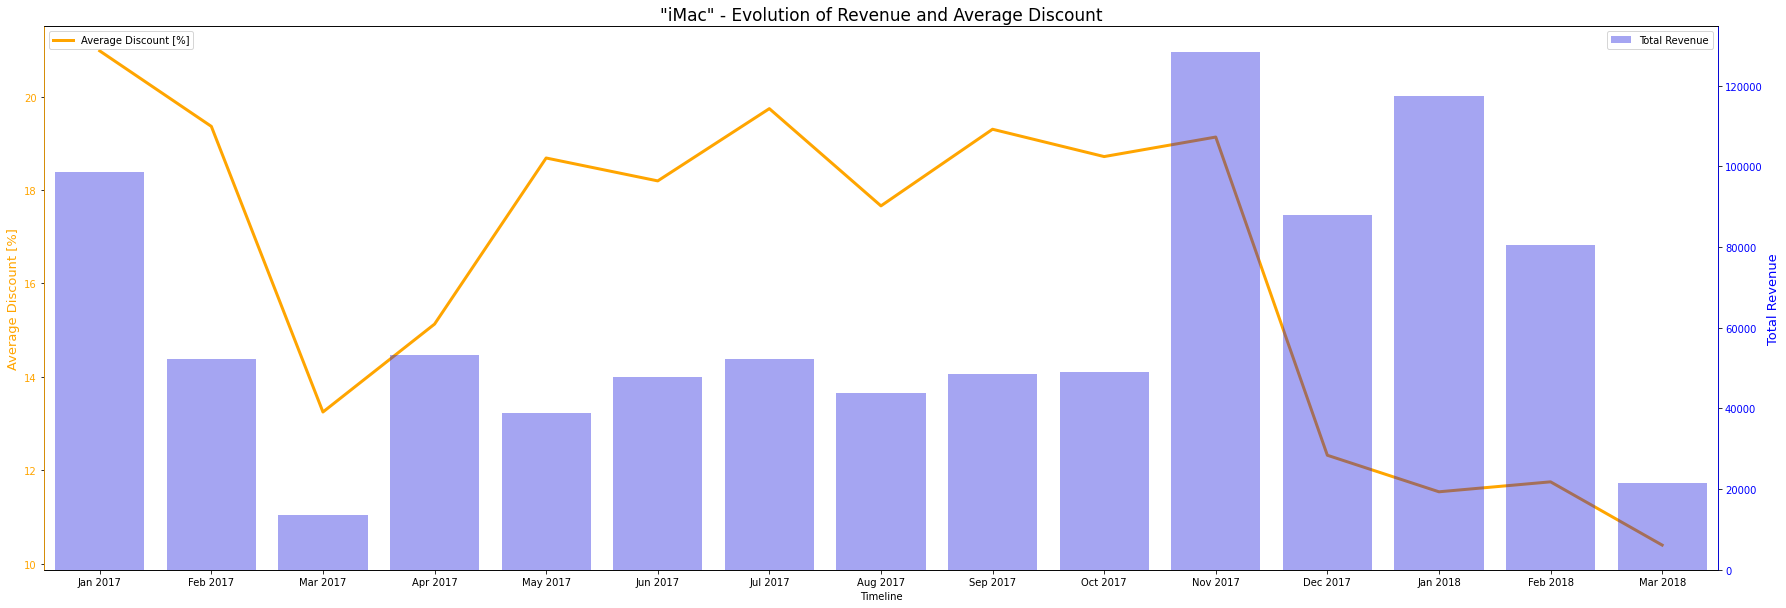

In [ ]:
# plot evo_iMac_plot

fig, ax = plt.subplots(figsize=(30,10))
plt.title('"iMac" - Evolution of Revenue and Average Discount', fontsize = 17)

width = .35
color1 = "blue"
color2 = "orange"

sns.lineplot(data=evo_iMac_plot,
             x="month_year",
             y="discount_perc",
             linewidth=3,
             color=color2,
             ax=ax,
             label="Average Discount [%]")

ax.set_ylabel("Average Discount [%]", fontsize = 13, color=color2)
ax.set_xlabel("Timeline")
ax.tick_params(axis="y", labelcolor=color2)
ax.ticklabel_format(style="plain", axis="y")
ax.legend(loc=2)


ax2 = ax.twinx()
sns.barplot(data=evo_iMac_plot,
            x="month_year",
            y="total_price",
            color=color1,
            ax=ax2,
            label="Total Revenue",
            alpha=0.4)

ax2.set_ylabel("Total Revenue", fontsize = 13, color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)

ax2.spines["left"].set_color(color2)
ax2.spines["right"].set_color(color1)

plt.show()

# **Show evolution of revenue and discount percentage of category "iPhone" in one graph**

In [ ]:
# create dataframe with evolution of revenue and mean discount of category "iPhone"

evo_iPhone_plot = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "IPhone"]
    .groupby(["month_year", "year", "month"])
    .agg({"total_price" : "sum", "discount_perc" : "mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

evo_iPhone_plot

,month_year,year,month,total_price,discount_perc
5,Jan 2017,2017,01,117543.69,33.757193
3,Feb 2017,2017,02,41787.91,25.608915
9,Mar 2017,2017,03,2773.09,30.007162
0,Apr 2017,2017,04,45624.35,26.196167
11,May 2017,2017,05,44617.34,20.758610
8,Jun 2017,2017,06,53200.97,22.451273
7,Jul 2017,2017,07,202425.72,31.470362
1,Aug 2017,2017,08,102930.79,28.732948
14,Sep 2017,2017,09,134326.03,24.769390
13,Oct 2017,2017,10,164942.56,25.408305


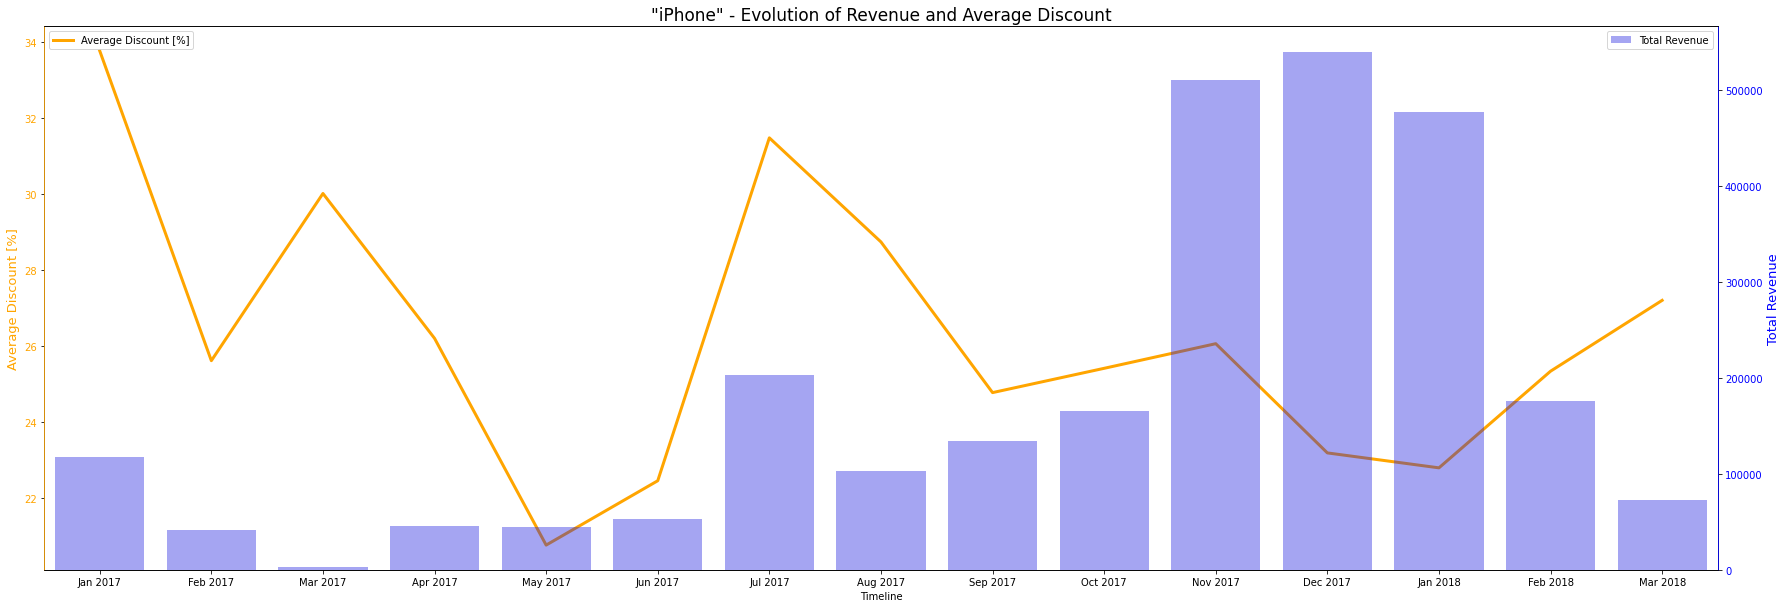

In [ ]:
# plot evo_iPhone_plot

fig, ax = plt.subplots(figsize=(30,10))
plt.title('"iPhone" - Evolution of Revenue and Average Discount', fontsize = 17)

width = .35
color1 = "blue"
color2 = "orange"

sns.lineplot(data=evo_iPhone_plot,
             x="month_year",
             y="discount_perc",
             linewidth=3,
             color=color2,
             ax=ax,
             label="Average Discount [%]")

ax.set_ylabel("Average Discount [%]", fontsize = 13, color=color2)
ax.set_xlabel("Timeline")
ax.tick_params(axis="y", labelcolor=color2)
ax.ticklabel_format(style="plain", axis="y")
ax.legend(loc=2)


ax2 = ax.twinx()
sns.barplot(data=evo_iPhone_plot,
            x="month_year",
            y="total_price",
            color=color1,
            ax=ax2,
            label="Total Revenue",
            alpha=0.4)

ax2.set_ylabel("Total Revenue", fontsize = 13, color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)

ax2.spines["left"].set_color(color2)
ax2.spines["right"].set_color(color1)

plt.show()

# **Show evolution of revenue and discount percentage of category "components" in one graph**

In [ ]:
# create dataframe with evolution of revenue and mean discount of category "components"

evo_comp_plot = (
    orders_merged_discount
    .loc[orders_merged_discount["category"] == "components"]
    .groupby(["month_year", "year", "month"])
    .agg({"total_price" : "sum", "discount_perc" : "mean"})
    .reset_index()
    .sort_values(["year", "month"])
)

evo_comp_plot

,month_year,year,month,total_price,discount_perc
5,Jan 2017,2017,01,518323.34,19.654832
3,Feb 2017,2017,02,272411.30,17.600809
9,Mar 2017,2017,03,74745.86,11.495115
0,Apr 2017,2017,04,206179.21,14.611132
11,May 2017,2017,05,289824.99,13.596091
8,Jun 2017,2017,06,341733.44,12.885019
7,Jul 2017,2017,07,504549.65,13.854105
1,Aug 2017,2017,08,341428.74,12.156534
14,Sep 2017,2017,09,445246.40,16.998883
13,Oct 2017,2017,10,502151.66,14.321856


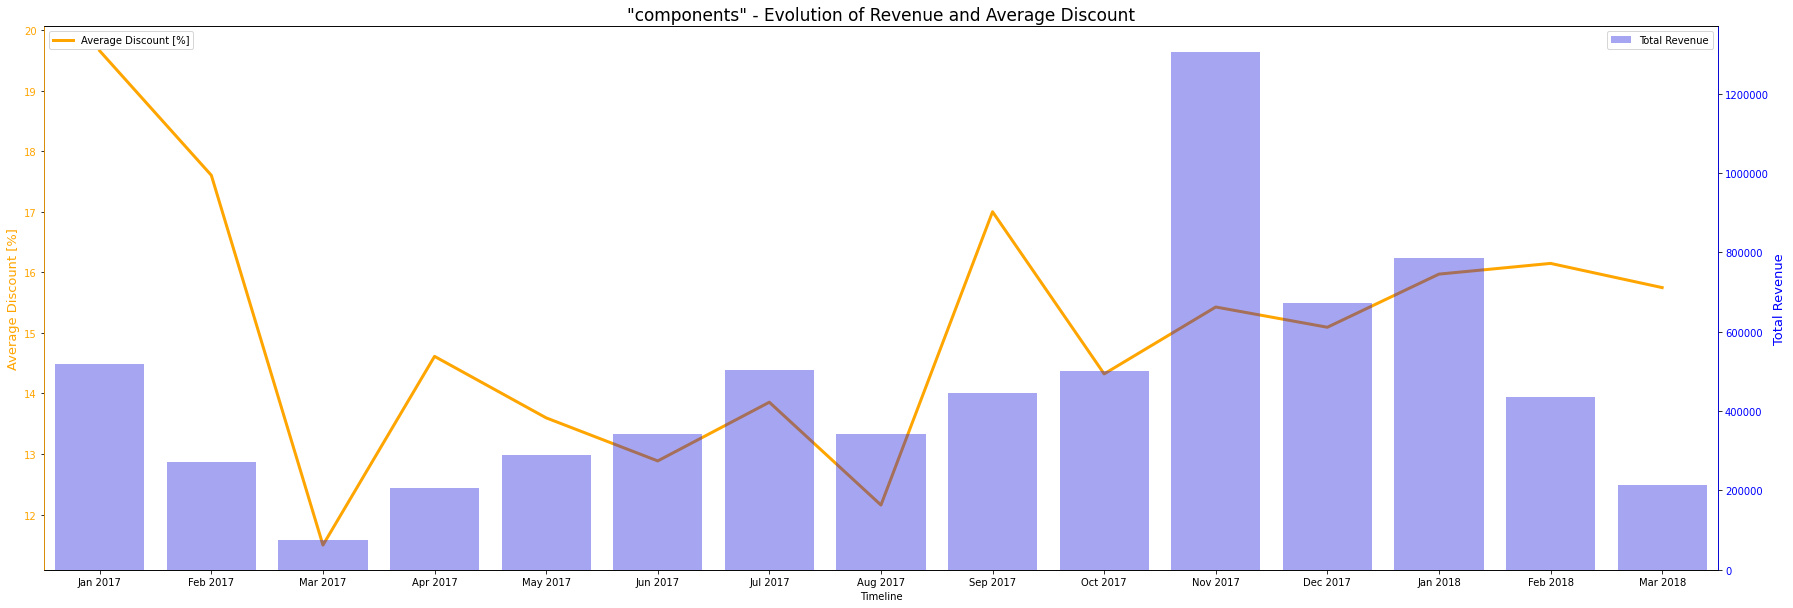

In [ ]:
# plot evo_comp_plot

fig, ax = plt.subplots(figsize=(30,10))
plt.title('"components" - Evolution of Revenue and Average Discount', fontsize = 17)

width = .35
color1 = "blue"
color2 = "orange"

sns.lineplot(data=evo_comp_plot,
             x="month_year",
             y="discount_perc",
             linewidth=3,
             color=color2,
             ax=ax,
             label="Average Discount [%]")

ax.set_ylabel("Average Discount [%]", fontsize = 13, color=color2)
ax.set_xlabel("Timeline")
ax.tick_params(axis="y", labelcolor=color2)
ax.ticklabel_format(style="plain", axis="y")
ax.legend(loc=2)


ax2 = ax.twinx()
sns.barplot(data=evo_comp_plot,
            x="month_year",
            y="total_price",
            color=color1,
            ax=ax2,
            label="Total Revenue",
            alpha=0.4)

ax2.set_ylabel("Total Revenue", fontsize = 13, color=color1)
ax2.tick_params(axis="y", labelcolor=color1)
ax2.ticklabel_format(style="plain", axis="y")
ax2.legend(loc=1)

ax2.spines["left"].set_color(color2)
ax2.spines["right"].set_color(color1)

plt.show()